<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DSFB-Assignment-5" data-toc-modified-id="DSFB-Assignment-5-1">DSFB Assignment 5</a></span><ul class="toc-item"><li><span><a href="#SETUP" data-toc-modified-id="SETUP-1.1">SETUP</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1.1">Imports</a></span></li><li><span><a href="#Constant-Seed" data-toc-modified-id="Constant-Seed-1.1.2">Constant Seed</a></span></li><li><span><a href="#Custom-Functions" data-toc-modified-id="Custom-Functions-1.1.3">Custom Functions</a></span></li></ul></li></ul></li><li><span><a href="#PART-1:-Preparation" data-toc-modified-id="PART-1:-Preparation-2">PART 1: Preparation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Classifier" data-toc-modified-id="Baseline-Classifier-2.1">Baseline Classifier</a></span></li></ul></li><li><span><a href="#PART-2:-Traditional-Machine-Learning-Models" data-toc-modified-id="PART-2:-Traditional-Machine-Learning-Models-3">PART 2: Traditional Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Regularized-Logit-Model" data-toc-modified-id="Regularized-Logit-Model-3.1">Regularized Logit Model</a></span></li><li><span><a href="#KNN-Classifier" data-toc-modified-id="KNN-Classifier-3.2">KNN Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3">Random Forest</a></span></li></ul></li><li><span><a href="#PART-3:-Convolutional-Neural-Networks-(CNN)" data-toc-modified-id="PART-3:-Convolutional-Neural-Networks-(CNN)-4">PART 3: Convolutional Neural Networks (CNN)</a></span></li><li><span><a href="#PART-4:-Stress-Your-Data-and-Re-Run-Models-and-Tests" data-toc-modified-id="PART-4:-Stress-Your-Data-and-Re-Run-Models-and-Tests-5">PART 4: Stress Your Data and Re-Run Models and Tests</a></span><ul class="toc-item"><li><span><a href="#Logit-model-on-rotated-dataset" data-toc-modified-id="Logit-model-on-rotated-dataset-5.1">Logit model on rotated dataset</a></span></li><li><span><a href="#CNN-on-rotated-dataset" data-toc-modified-id="CNN-on-rotated-dataset-5.2">CNN on rotated dataset</a></span></li></ul></li></ul></div>

# DSFB Assignment 5

In this assignment, you will classify images from the MNIST dataset (Source: http://yann.lecun.com/exdb/mnist/). The dataset includes hand written images and you need to predict the number (numerical digit) associated with each image. Every image has a dimension of 28 * 28 pixels and is gray-scale. The input data includes the intensity associated with each pixel row by row, starting from top-left corner (784 pixels in total). 

The label field shows the number associated with each image. 

A state-of-the-art model achieves an error rate of only 0.23% (Ciresan et al. CVPR 2012); you should be able to hit an error rate of less than 1% in this assignment. 

<img src="http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" width="700" height="500" align="center"/>


Image source: http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png

## SETUP

### Imports

Note that this assignment requires Tensorflow version 2. It must be version 2, as the Keras model in Tensorflow changed as of version 2. You can tensorflow with this pip command:

    pip install -U tensorflow


In [2]:
# Standard imports
import pandas as pd
import numpy as np
import itertools

# Data science packages
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics         import confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import OneHotEncoder

# Neural networks
import tensorflow as tf

# Visualization packages
#import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

plt.style.use('ggplot')

%matplotlib inline



### Constant Seed

In [2]:
# Set constant SEED for probabilistic functions for replicability
SEED = 12345

### Custom Functions

We again give you a few, custom, helper functions to get you going.

In [3]:
def plot_confusion_matrix(cm, classes=[0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    """ 
    Function to plot a sklearn confusion matrix, showing number of cases per prediction condition. 
    The cm parameter can be an object created by the sklearn confusion_matrix() function.
    
    Args:
        cm         this must be a sklearn confusion matrix 
        classes    levels of the class being predicted; default to binary outcome
        normalize  apply normalization by setting `normalize=True`
        title      title for the plot
        cmap       color map
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round (cm[i, j],2), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.grid()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [4]:
def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    """
    Function to plot an ROC curve in a consistent way.
    The fpr and tpr parameters can be created by the sklearn roc_curve() function.
    
    Args:
        fpr        False Positive Rate (list of multiple points)
        tpr        True Positive Rate (list of multiple points)
        title      Title above the plot
        note       Note to display in the bottom-right of the plot
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

In [5]:
def plot_validation_curve(train_scores, cv_scores, x_data, y_label='', x_label='', x_logscale=False):
    
    plt.title('Validation Curve')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(0.0, 1.1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    cv_scores_mean    = np.mean(cv_scores,    axis=1)
    
    if x_logscale:
        plt.semilogx(x_data, train_scores_mean, 'o-', color="r", label="Training score")
        plt.semilogx(x_data, cv_scores_mean,    'o-', color="g",  label="Cross-validation score")        
    else:
        plt.plot(x_data, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(x_data, cv_scores_mean,    'o-', color="g", label="Cross-validation score")
        
    plt.legend(loc='center')
    plt.show()

# PART 1: Preparation

**PROBLEM**: Load the image data into a pandas dataset. 

In [6]:
# Load data into a Numpy array first
import idx2numpy

train_data_path = 'data/train-images.idx3-ubyte'
train_labels_path = 'data/train-labels.idx1-ubyte'
X = idx2numpy.convert_from_file(train_data_path)
y = idx2numpy.convert_from_file(train_labels_path)
print('Shape of traning dataset: ', X.shape)

Shape of traning dataset:  (60000, 28, 28)


We see that we have 60000 images each of size 28x28 pixels

In [7]:
# Flatten the images to have arrays of 784 pixels
X = np.array([x.flatten() for x in X])
print('Shape of traning dataset: ', X.shape)

Shape of traning dataset:  (60000, 784)


In [8]:
# Transform the np array into a Pandas dataframe
training_set = pd.DataFrame()
training_set['Images']=[list(x) for x in X]
training_set['Labels'] = y
# View the top rows
training_set.head()

,Images,Labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9


**PROBLEM**: Check the data. Is it complete? Right shape? Any problems or inconsistencies?

In [9]:
print('Shape of traning dataset: ', training_set.shape)

Shape of traning dataset:  (60000, 2)


We have the correct shape for our dataset.

**PROBLEM**: Separate data into target variable and features.

In [10]:
# Separate features and target
features = training_set['Images']
target = training_set['Labels']

**PROBLEM**: Basic Feature Engineering.

In [12]:
# Normalize all features to be between 0 and 1
# Since our data is grayscale, we can just normalize it by dividing over 255
X = X/255.

**PROBLEM**: Inspect distribution of target.

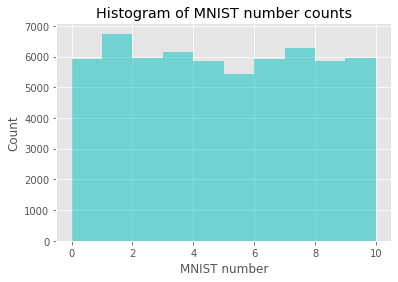

In [13]:
# Check distribution of the labels (across numerical digits)
plt.hist(target, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], facecolor='c', alpha=0.5)
plt.xlabel('MNIST number')
plt.ylabel('Count')
plt.title('Histogram of MNIST number counts')
plt.show()

**PROBLEM**: Plot images 27, 83, and 158 in ONE dimension.  

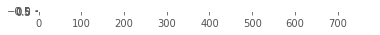

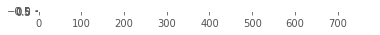

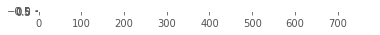

In [14]:
# Plot images 27, 83, and 158 in one dimension
for idx in [27,83,158]:
    example_img = np.resize(X[idx],(1,784))
    plt.imshow(example_img,cmap="Greys")
    plt.show()

**PROBLEM**: Plot images 27, 83, and 158 in TWO dimensions. Tip: use `plt.imshow()`

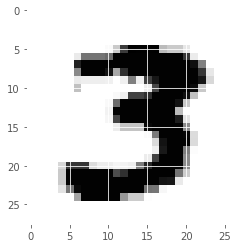

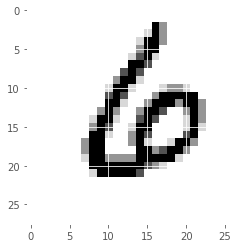

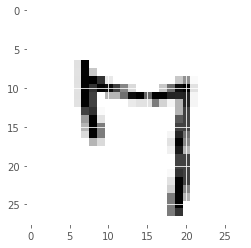

In [15]:
# Plot images 27, 83, and 158 in TWO dimension
for idx in [27,83,158]:
    example_img = np.resize(X[idx],(28,28))
    plt.imshow(example_img,cmap="Greys")
    plt.show()

**PROBLEM**: Create Training and Testing sets. Be sure to use SEED so our results and your results are comparable. 

In [16]:
# Create Training and Testing sets -- complete the line of code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Baseline Classifier

Before getting started on specific models, run a baseline classifier to set a benchmark for improved models.

**PROBLEM**: Use the `DummyClassifier()` model to make a baseline prediction.

In [16]:
# Define a baseline using DummyClassifier() and print the baseline accuracy. Remember to set the SEED!
DC = DummyClassifier(random_state=SEED)
DC.fit(X_train, y_train)
print("Prediction score of the dummy classifier = ", DC.score(X_test,y_test))

Prediction score of the dummy classifier =  0.10333333333333333


**QUESTION**: What was the baseline accuracy? Is that what you expected? Why or why not? 

**Answer**: 
We see that the accuracy is really low.
It is actually expected because for the dummy classifier uses **by default stratified approach**: It uses the dataset distribution to make the predictions [source](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) but we have seen that our labels are pretty much linearly distributed accross the values.

**QUESTION**: One might think that the baseline accuracy we received as technically impossible... Why would it have been impossible? Why was it in fact possible?  

**Answer**: I already mentioned that in the docs it is stated: **"“stratified”: generates predictions by respecting the training set’s class distribution."**, which means that if we have a uniform distribution over the labels in our training dataset (which is the case), the dummy classifier will basically choose randomly.
Hence it has **0.1 probability of getting the correct label**



**QUESTION**: What "strategy" parameter should you pass to `DummyClassifier()` and why? 

**Answer**: 
In general the stratified strategy is the best among the choices proposed. But in this case it will not help because our dataset is quite balanced.

# PART 2: Traditional Machine Learning Models

## Regularized Logit Model

**PROBLEM**: Use a Ridge-Regularized Multinomial Logit Model to predict labels. 
  * Use a stratified K-Fold cross-validation schema with 3 folds.
  * Tune hyperparameter C, from logspace 10^-5 to 10^5, in steps of 1 in the exponent.
  * Use **`accuracy`** for the tuning score.
  * Use the `validation_curve()` function from sklearn to train and validate models across C.
  * Set `n_jobs` to -1 to use all available CPU cores on your computer.
  * Set the random seed.

In [45]:
# Define model
C_values = np.logspace(-5, 5, num=11, endpoint=True, base=10.0)
LR = LogisticRegression(n_jobs = -1)
cv_schema = StratifiedKFold(n_splits=3, random_state=SEED)

# Now use the validation_curve() function to train/validate models...
train_scores, cv_scores = validation_curve(LR, X_train, y_train,\
                                                   param_name = "C", param_range = C_values,\
                                                   cv=cv_schema)

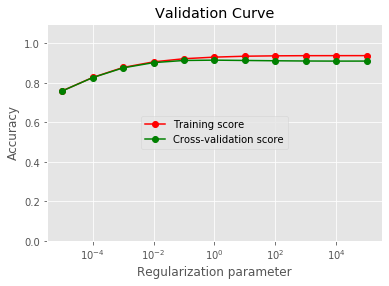

In [46]:
# Plot a validation curve across levels of C, using a logscale for the x axis

plot_validation_curve(train_scores, cv_scores, C_values, y_label='Accuracy',\
                      x_label='Regularization parameter', x_logscale=True)


**PROBLEM**: What was the best value of C?

The best value of C is the one which gives the best accuracy on the Validation set.

In [79]:
# Obtain the best value of the hyper parameter
cv_scores_mean = np.mean(cv_scores, axis=1)
best_C_value = C_values[np.argmax(cv_scores_mean)]
print("Best value for the parameter C = ", best_C_value)

Best value for the parameter C =  1.0


**QUESTION**: Should we believe this particular "optimal" value of C. Why or why not? 

In [80]:
# View cross validation scores
print("cv scores mean: ", cv_scores_mean)
print()
print("Accuracy we get from C = 1.0 is ", np.max(cv_scores_mean))

cv scores mean:  [0.75916666 0.82674984 0.87597932 0.90235435 0.91331263 0.91487529
 0.91331272 0.91175011 0.91058338 0.91006255 0.91016674]

Accuracy we get from C = 1.0 is  0.914875289532499


**Answer**:  The value we get for C seems reasonable. Because we can see that the accuracy on the Validation set is going up until it hits the value C=1.0 and then goes down again which tells that our model is overfitting afterwards.

However this value could be more precise if we test for even more values between 10^-1 and 1.

**QUESTION**: Comment on the performance of the Logit Model overall. Why did it (or did it not) perform well? Also comment on how regularization affected your results, and explain why regularization performed as it did. 

**Answer**: 
The logit model did quite well with an accuracy of 0.914.
Regularization enabled us to avoid overfitting as we can see from the validation curve above (Training Score going up but Validation score going down).

**QUESTION**: Would these results survive manipulation of the underlying picture (for example, randonly shifting pictures left/right or rotating them). 

**Answer**:  
This model would not survive any manipulation of the pictures, because how the model works is that it considers the weight of each pixel independently from the others. So if those pixels came to be "noisy" our model will perform a lot worse.

**PROBLEM**: What is the accuracy of the Logit Model on the __test set__ at the best value of C?

In [63]:
# Calculate Accuracy of Logit Model on test set at best value of C
LR = LogisticRegression(C = best_C_value, random_state = SEED, n_jobs=-1)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print("Accuracy on the test set is equal to: ", LR.score(X_test, y_test))

Accuracy on the test set is equal to:  0.9155833333333333


Let's look at what the model learned (the weights it attributed to each pixel for each number) more into details

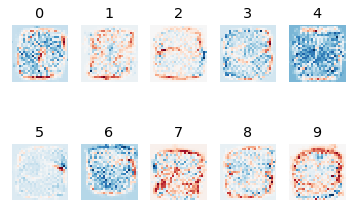

In [82]:
weights = LR.coef_
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

* Note that the blue pixels means that this pixel contributes a lot to classify the image to the given class and red pixels mean that it contributes negatively to the given class.

## KNN Classifier

**PROBLEM**: Repeat the exercise above with a KNN Classifier to predict labels. 
  * Use a stratified K-Fold cross-validation schema with 3 folds.
  * Tune hyperparameter K from K=5 to K=45, in 5 point increments. 
  * Make sure to use the random state SEED, and remember that KNN will be slow to run...
  * Use **`accuracy`** for the tuning score.
  * Use the `validation_curve()` function from sklearn to train and validate models across K.
  * Set `n_jobs` to -1 to use all available CPU cores on your computer.
  * Set the random seed.

In [65]:
# Use a KNN Classifier to predict labels

K_values  = np.array([int(i) for i in np.linspace(5.0, 45.0, 5)])
model     = KNeighborsClassifier(n_jobs = -1)
cv_schema = StratifiedKFold(n_splits=3, random_state=SEED)

train_scores_val, cv_scores_val = validation_curve(model, X_train, y_train,\
                                                   param_name = "n_neighbors", param_range = K_values,\
                                                   cv=cv_schema)

**PROBLEM**: Use the `validation_curve()` function to plot the Training and Cross-Validated results.

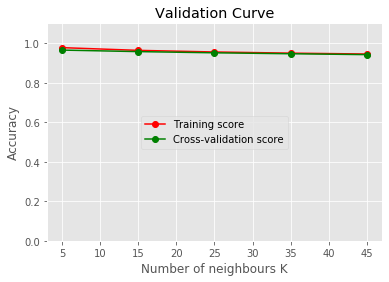

In [66]:
# Plot a validation curve across levels of K

plot_validation_curve(train_scores_val, cv_scores_val, \
                      K_values, y_label='Accuracy', \
                      x_label='Number of neighbours K', x_logscale=False)


In [72]:
# Obtain the best value of the hyper parameter
cv_scores_mean = np.mean(cv_scores_val, axis=1)
best_K_value = K_values[np.argmax(cv_scores_mean)]
print("Best value for the parameter K = ", best_K_value)

Best value for the parameter K =  5


**QUESTION**: Comment on and explain your results from the KNN Model. 

**Answer**:  
We get that the best value for the number of neighbours is K = 5. We see from the validation curve that for larger values of K the Accuracy goes down both for the training set and the cross validation score. We also see that the KNN classifier performs better than the regularized logit model.

**PROBLEM**: What is the accuracy of the KNN Model on the __test set__ at the best value of K?

In [74]:
# Calculate Accuracy of KNN Model on test set at best value of K
KNN = KNeighborsClassifier(n_neighbors = best_K_value, n_jobs=-1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
print("Accuracy on the test set is equal to: ", KNN.score(X_test, y_test))

Accuracy on the test set is equal to:  0.9706666666666667


## Random Forest

**PROBLEM**: Repeat the exercise above with a Random Forest Classifier to predict labels. 
  * Use a stratified K-Fold cross-validation schema with 3 folds.
  * Tune hyperparameter K from K=5 to K=45, in 5 point increments. 
  * Make sure to use the random state SEED, and remember that KNN will be slow to run...
  * Use **`accuracy`** for the tuning score.
  * Use the `validation_curve()` function from sklearn to train and validate models across K.
  * Set `n_jobs` to -1 to use all available CPU cores on your computer.
  * Set the random seed.

In [81]:
# Use a Random Forest Classifier to predict labels

N_values  = np.array([int(i) for i in np.linspace(5.0, 45.0, 5)])
model     = RandomForestClassifier(n_jobs = -1)
cv_schema = StratifiedKFold(n_splits=3, random_state=SEED)

train_scores_val, cv_scores_val = validation_curve(model, X_train, y_train,\
                                                   param_name = "n_estimators", param_range = N_values,\
                                                   cv=cv_schema)

**PROBLEM**: Use the `validation_curve()` function to plot the Training and Cross-Validated results.

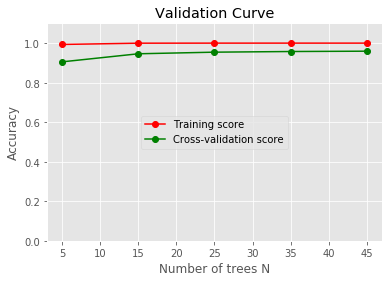

In [82]:
# Plot a validation curve across levels of K

plot_validation_curve(train_scores_val, cv_scores_val, \
                      N_values, y_label='Accuracy', \
                      x_label='Number of trees N', x_logscale=False)


**QUESTION**: Comment on and explain your results from the Random Forest Model. 

**Answer**: 
We see that for N=5, we have low value for cross-validation accuracy, this observation corresponds to underfitting meaning our model is not precise enough to model the data at hand. We see that the cross-validation accuracy goes up when we increase the number of forests N.

**QUESTION**: Comment on the behavior of the Training accuracy and the Cross-Validation accuracy in the Random Forest model for this problem. Explain why you think they performed (relatively) as they did. 

In [84]:
# Obtain the best value of the hyper parameter
cv_scores_mean = np.mean(cv_scores_val, axis=1)
best_N_value = N_values[np.argmax(cv_scores_mean)]
print("Best value for the parameter N = ", best_N_value)

Best value for the parameter N =  45


In [87]:
# Do some inspections...
# View cross validation scores
training_scores_mean = np.mean(train_scores_val, axis=1)
print("training accuracy mean: ", training_scores_mean)
print()
print("cv accuracy mean: ", cv_scores_mean)
print()
print("Accuracy we get from N = 45 is ", np.max(cv_scores_mean))

training accuracy mean:  [0.99329169 0.99968751 0.99994792 1.         0.99998958]

cv accuracy mean:  [0.90537504 0.94614578 0.95427069 0.95756227 0.95924999]

Accuracy we get from N = 45 is  0.9592499908118052


**Answer**: 
* For higher values of N, we get a better value of Training accuracy (We actually reach accuracy=1. for N=35 ) as well as a better value of cross validation accuracy. 

* However form the validation curve, we see that the cross validation accuracy does not get as good as the training accuracy. 

* This can be explained by the fact that a Random Forest Model does not generalize very well on new data samples also it is clear that our model is overfitting on the training data.

**PROBLEM**: What is the accuracy of the Random Forest Model on the __test set__ at the best value of N Estimators?

In [91]:
# Obtain the best value of the hyper parameter
cv_scores_mean = np.mean(cv_scores_val, axis=1)
best_N_value = N_values[np.argmax(cv_scores_mean)]
print("Best value for the parameter N = ", best_N_value)

# Calculate Accuracy of Random Forest Model on the test set at best value of N Estimators
RF = RandomForestClassifier(n_estimators = best_N_value, n_jobs=-1, random_state=SEED)
RF.fit(X_train, y_train)

print("Accuracy on the test set is equal to: ", RF.score(X_test, y_test))

Best value for the parameter N =  45
Accuracy on the test set is equal to:  0.9635833333333333


# PART 3: Convolutional Neural Networks (CNN) 

**PROBLEM**: Prepare data for a CNN. 

In [23]:
# Reshape image into 3 dimensions where third dimension is only 1 deep (so: height = 28px, width = 28px , canal = 1)
X_train_reshaped = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test_reshaped  = X_test.reshape(X_test.shape[0],28, 28, 1)
X_train_reshaped.shape

(48000, 28, 28, 1)

In [24]:
# Encode target labels to one hot vectors
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))
enc.categories_

[array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])]

In [25]:
y_train_ohe  = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test_ohe   = enc.transform(y_test.reshape(-1, 1)).toarray()
y_train_ohe.shape

(48000, 10)

**PROBLEM**: Print the value of some pixels from the new, reshaped array to show you can access the data. 

In [26]:
# Print first pixel in first observation
X_train_reshaped[0][0][0]

array([0.])

In [27]:
# Print last pixel in last observation
height = 28
width = 28
X_train_reshaped[X_train_reshaped.shape[0]-1][height-1][width-1]

array([0.])

In [28]:
# Print pixel from Observation 1234, horizontal offset 23, vertical offset 12
X_train_reshaped[1234][23][12]

array([0.14901961])

**PROBLEM**: Make a custom function to build and return a CNN object from TensorFlow.Keras (version 2). 

In [61]:
# Custom function to build and return a cnn model from TensorFlow.Keras (version 2)
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
def cnn_model():
    model = tf.keras.Sequential()
    input_shape = (height, width, 1)
    #convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    #64 convolution filters used each of size 3x3
    model.add(Conv2D(64, (3, 3), activation='relu'))
    #choose the best features via pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.25))
    #flatten dimensions
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.5))
    #output a softmax to squash the matrix into output probabilities
    model.add(Dense(10, activation='softmax'))
    
    # We use categorical_crossentropy loss function as it is a multi-class classification problem
    model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
    return model

**PROBLEM**: Instantiate a model from your function above and print a diagram for it. 

In [62]:
# Instantiate a model from your function above and print a diagram for it.
cnn =  cnn_model()

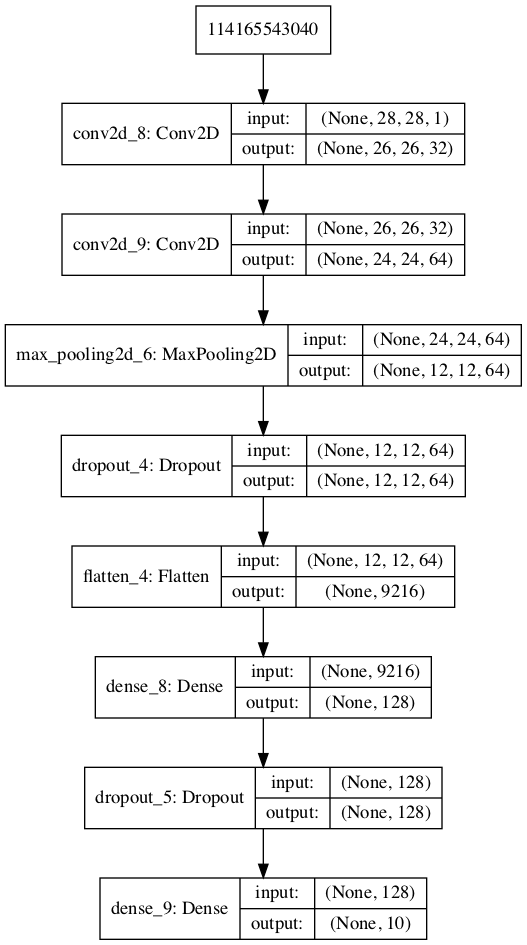

In [158]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='cnn_diagram.png', show_shapes=True, show_layer_names=True)
Image("cnn_diagram.png")

**PROBLEM**: Fit the model for 10 epochs and a batch size of 200, and then print a summary. _Tip:_ Be sure to use the reshaped training data.

In [133]:
# Fit the model and print a summary
batch_size = 200
num_epoch = 10

cnn.fit(X_train_reshaped, y_train_ohe,
          batch_size=batch_size,
          epochs=num_epoch,
          validation_split = 0.2)

Train on 38400 samples, validate on 9600 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
38400/38400 [==============================] - 105s 3ms/sample - loss: 0.4273 - acc: 0.8658 - val_loss: 0.1098 - val_acc: 0.9689
Epoch 2/10
38400/38400 [==============================] - 103s 3ms/sample - loss: 0.1249 - acc: 0.9625 - val_loss: 0.0709 - val_acc: 0.9769
Epoch 3/10
38400/38400 [==============================] - 104s 3ms/sample - loss: 0.0891 - acc: 0.9738 - val_loss: 0.0546 - val_acc: 0.9818
Epoch 4/10
38400/38400 [==============================] - 102s 3ms/sample - loss: 0.0725 - acc: 0.9785 - val_loss: 0.0471 - val_acc: 0.9841
Epoch 5/10
38400/38400 [==============================] - 104s 3ms/sample - loss: 0.0601 - acc: 0.9815 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 6/10
38400/38400 [==============================] - 100s 3ms/sample - loss: 0.0528 - acc: 0.9842 - val_loss: 0.0404 - val_acc: 0.9869
Epoch 7/10
38400/38400 [==============================] - 103s 

In [135]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

**PROBLEM**: Evaluate the trained CNN model on the test set and print the loss score and accuracy score. 

In [138]:
# Evaluate trained model on test set
score = cnn.evaluate(X_test_reshaped, y_test_ohe, batch_size=batch_size)

12000/12000 [==============================] - 8s 693us/sample - loss: 0.0377 - acc: 0.9902


In [139]:
# Print the loss and accuracy scores
print('test loss, test acc:', score)

test loss, test acc: [0.037732643451696884, 0.99025]


**PROBLEM**: Get the predicted values and identify the correct cases/incorrect cases. 

In [164]:
# Get predicted values
predictions = cnn.predict_classes(X_test_reshaped)
predictions

array([9, 0, 9, ..., 4, 8, 7])

In [163]:
# We create an array containing boolean values denoting if each predicted value is correct
correctness_flag = predictions == y_test
correctness_flag

array([ True,  True,  True, ...,  True,  True,  True])

**PROBLEM**: Print number of correctly and incorrectly clasified observations. 

In [169]:
nbr_correct = np.sum(correctness_flag)
nbr_false = len(correctness_flag)-nbr_correct
print("Number of correctly classified values = ", nbr_correct)
print("Number of false classified values = ", nbr_false)

Number of correctly classified values =  11883
Number of false classified values =  117


**PROBLEM**: Display 5 examples of incorrectly classified images. 

In [184]:
false_indices = np.where(correctness_flag == False)
false_indices

(array([  466,   471,   796,   869,   901,  1166,  1236,  1271,  1293,
         1381,  1449,  1515,  1590,  1633,  1686,  1771,  1840,  1942,
         1965,  2272,  2331,  2507,  2550,  2634,  2656,  2854,  2861,
         2868,  3116,  3147,  3184,  3867,  3917,  3981,  4084,  4096,
         4249,  4299,  4709,  4869,  4943,  5021,  5221,  5247,  5294,
         5296,  5349,  5410,  5424,  5429,  5591,  5627,  5743,  6172,
         6192,  6416,  6524,  6548,  6615,  6814,  6867,  7222,  7472,
         7526,  7623,  7635,  7677,  7750,  8092,  8155,  8198,  8384,
         8416,  8419,  8548,  8555,  8673,  8689,  8799,  8801,  8806,
         8830,  9130,  9131,  9151,  9165,  9220,  9424,  9644,  9649,
         9796,  9828, 10044, 10062, 10071, 10328, 10348, 10375, 10403,
        10558, 10588, 10608, 10692, 10718, 10875, 10877, 10905, 10992,
        11171, 11303, 11324, 11394, 11472, 11509, 11706, 11877, 11980]),)

The predicted digit is:  3   The correct value is:  5


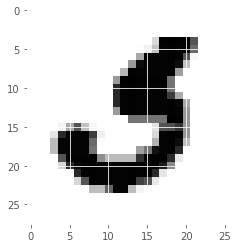

The predicted digit is:  6   The correct value is:  8


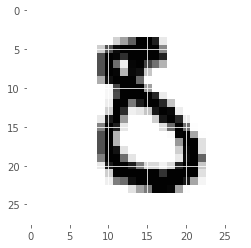

The predicted digit is:  3   The correct value is:  2


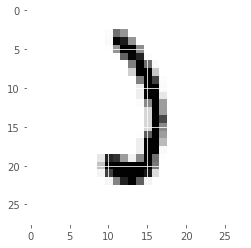

The predicted digit is:  7   The correct value is:  2


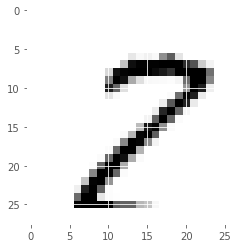

The predicted digit is:  1   The correct value is:  9


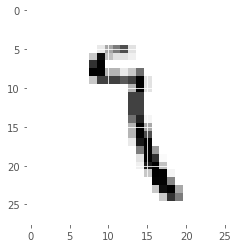

In [198]:
# Display the first 5 examples of incorrectly classified images
false_indices = np.where(correctness_flag == False)
for i in np.arange(5):
    idx = false_indices[0][i]
    example_img = X_test_reshaped[idx].reshape(28, 28)
    plt.imshow(example_img,cmap="Greys")
    print ('The predicted digit is: ',predictions[idx], "  The correct value is: ", y_test[idx])
    
    plt.show()

**QUESTION**: Explain why you think the CNN made an error on those observations. 

**Answer**: We clearly see that the digits that our model predicted wrong are either cropped or really misleading.

Even a human would have trouble interpreting most of those digits.

**PROBLEM**: Predict and then use the plot the custom `plot_confusion_matrix()` function to plot the confustion matrix for all ten digits. 

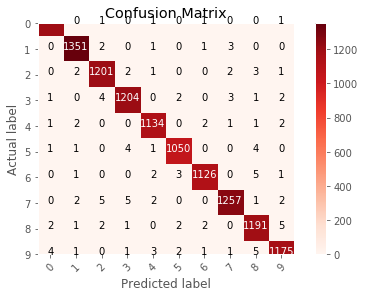

In [218]:
# Print the confustion matrix for all ten digits
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=np.arange(10))

# PART 4: Stress Your Data and Re-Run Models and Tests

This final part of this assignment is open-ended... Think of ways to distort, manipulate, and stress your training data. Take those steps and then re-run a Logit Model and a CNN model. Compare how the two models perform (relatively) given the stressed training data. Comment on what you find. This is worth 25% of the assignment, so be creative and thorough.

In [29]:
import tensorflow_addons as tfa

In [34]:
# We generate a random angle for each image by which we will rotate them
# We constraint the rotation angle between -45,45 degrees to keep our models "useful"
random_angles_train = np.random.uniform(-np.pi/4. , np.pi/4. , X_train.shape[0]).astype('float32')
random_angles_test = np.random.uniform(-np.pi/4. , np.pi/4. , X_test.shape[0]).astype('float32')

In [35]:
X_train_rotated = tfa.image.rotate(images = X_train_reshaped, angles = random_angles_train)
X_test_rotated = tfa.image.rotate(images = X_test_reshaped, angles = random_angles_test)

**Now let's run a regularized logit model and a convolutional neural network on the randomly rotated dataset and see how the perform.**

## Logit model on rotated dataset

In [44]:
# Reshape rotated dataset to feed to logit model
training_set = X_train_rotated.numpy().reshape(X_train_rotated.numpy().shape[0],-1)
test_set = X_test_rotated.numpy().reshape(X_test_rotated.numpy().shape[0],-1)

# Define model
C_values = np.logspace(-5, 5, num=11, endpoint=True, base=10.0)
LR = LogisticRegression(n_jobs = -1)
cv_schema = StratifiedKFold(n_splits=3, random_state=SEED)

# Now use the validation_curve() function to train/validate models...
train_scores, cv_scores = validation_curve(LR, training_set, y_train,\
                                                   param_name = "C", param_range = C_values,\
                                                   cv=cv_schema)

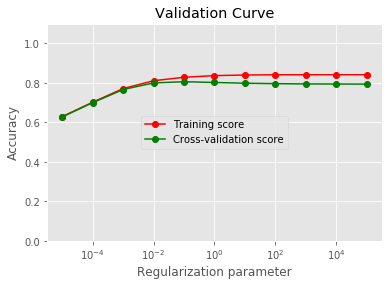

In [46]:
# Plot a validation curve across levels of C, using a logscale for the x axis

plot_validation_curve(train_scores, cv_scores, C_values, y_label='Accuracy',\
                      x_label='Regularization parameter', x_logscale=True)

In [47]:
# Obtain the best value of the hyper parameter
cv_scores_mean = np.mean(cv_scores, axis=1)
best_C_value = C_values[np.argmax(cv_scores_mean)]
print("Best value for the parameter C = ", best_C_value)

Best value for the parameter C =  0.1


In [49]:
# View cross validation scores
print("cv scores mean: ", cv_scores_mean)
print()
print("Accuracy we get from C = 0.1 is ", np.max(cv_scores_mean))

cv scores mean:  [0.62806319 0.69987527 0.76622945 0.79970872 0.80577136 0.80193798
 0.79827121 0.79589619 0.79466702 0.79412537 0.79377117]

Accuracy we get from C = 0.1 is  0.8057713631705178


In [60]:
# Calculate Accuracy of Logit Model on test set at best value of C
LR = LogisticRegression(C = best_C_value, random_state = SEED, n_jobs=-1)
LR.fit(training_set, y_train)
print("Accuracy on the test set is equal to: ", LR.score(test_set, y_test))

Accuracy on the test set is equal to:  0.8099166666666666


* We see that our model performs a bit worse than what it did before rotating the dataset.
* Accuracy is now equal to 0.80 compared to 0.91 before the rotation.
* This was expected, because the logit model sees each pixel as a single feature. So if the images are rotated, the pixels that were supposed to be white for some number became black etc.. and the model waill penalize those pixels incorrectly
* However the **accuracy we get is a lot better than expected**: Even after a random rotation on numbers by angles between [-45,45] degrees we still get 0.8 accuracy.
* Let's look at what the model learned (the weights it attributed to each pixel for each number) more into details

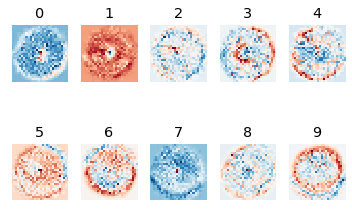

In [77]:
weights = LR.coef_
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

* If we compare those weights to the ones we got when training using the dataset without rotation we see that these shapes look a lot more round. This makes a lot of sence because the model is trying to learn the rotations of the numbers as well.

## CNN on rotated dataset

In [63]:
# We reuse the CNN model defined above but we train it on the rotated dataset
X_train_rotated = X_train_rotated.numpy()
X_test_rotated = X_test_rotated.numpy()

batch_size = 200
num_epoch = 10

cnn.fit(X_train_rotated, y_train_ohe,
          batch_size=batch_size,
          epochs=num_epoch,
          validation_split = 0.2)

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 85s 2ms/sample - loss: 2.2883 - accuracy: 0.1326 - val_loss: 2.2737 - val_accuracy: 0.2030
Epoch 2/10
38400/38400 [==============================] - 74s 2ms/sample - loss: 2.2713 - accuracy: 0.1670 - val_loss: 2.2537 - val_accuracy: 0.3042
Epoch 3/10
38400/38400 [==============================] - 72s 2ms/sample - loss: 2.2519 - accuracy: 0.2010 - val_loss: 2.2327 - val_accuracy: 0.3825
Epoch 4/10
38400/38400 [==============================] - 71s 2ms/sample - loss: 2.2322 - accuracy: 0.2336 - val_loss: 2.2098 - val_accuracy: 0.4403
Epoch 5/10
38400/38400 [==============================] - 71s 2ms/sample - loss: 2.2105 - accuracy: 0.2628 - val_loss: 2.1847 - val_accuracy: 0.4866
Epoch 6/10
38400/38400 [==============================] - 71s 2ms/sample - loss: 2.1857 - accuracy: 0.2941 - val_loss: 2.1567 - val_accuracy: 0.5193
Epoch 7/10
38400/38400 [==============================] -

In [71]:
score = cnn.evaluate(X_test_rotated, y_test_ohe, batch_size=batch_size)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [69]:
print('test loss, test acc:', score)

test loss, test acc: [2.010788381099701, 0.5880833]


In [65]:
predictions = cnn.predict_classes(X_test_rotated)
correctness_flag = predictions == y_test
nbr_correct = np.sum(correctness_flag)
nbr_false = len(correctness_flag)-nbr_correct
print("Number of correctly classified values = ", nbr_correct)
print("Number of false classified values = ", nbr_false)

Number of correctly classified values =  7057
Number of false classified values =  4943


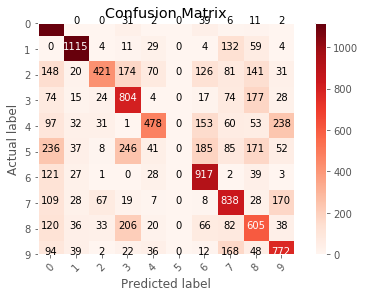

In [66]:
# Print the confustion matrix for all ten digits
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=np.arange(10))

* We see that the accuracy of the CNN model drops drastically from 0.99 to 0.58
* This result was actually expected because CNNs have limited ability to be spatially invariant to the input data as stated in this [source](http://papers.nips.cc/paper/5854-spatial-transformer-networks.pdf)
* This limitation of CNNs is due to having only a limited, pre-defined pooling mechanism for dealing with variations in the spatial arrangement of data.
* The reasearch paper stated above introduce a Spatial Transformer module, that can be included into a standard neural networks to provide spatial transformation capabilities.